### Compositional analysis of DMD Myeloid snRNA-Seq dataset using `ScCoda`
- **Developed by**: Srivalli Kolla
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 19_06_2024
- **Last modified**: 19_06_2024

# Import statements and environments

In [37]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt

### Set up working environment

In [38]:
sc.settings.verbosity = 3
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

# Data preparation

## Data loading

In [39]:
adata = sc.read_h5ad('../../data/heart_mm_nuclei-23-0092_scANVI-Myeloid_states_ctl240502.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 41716 × 16060
    obs: 'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_type', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
    var: 'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD

### Data cleanup

In [40]:
adata.obs = adata.obs.rename(columns={'cell_type': 'cell_types'})
adata.obs

,orig.ident,Age_group,BMI,COVID_severity,COVID_status,Ethnicity,Group,Sex,annotation_broad,annotation_detailed,...,pct_counts_ribo,percent_mt2,percent_chrY,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,MPC_Annotation,compartment
AAACCCAGTCAAGCGA-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,34.0,NaN,DMD
AAACCCAGTGGCTTGC-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.0,34.0,NaN,DMD
AAACGCTGTAGTTACC-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.0,34.0,NaN,DMD
AAAGGATGTTATCTGG-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27.0,34.0,NaN,DMD
AAAGGATTCGTAGTCA-1_1-MDX_POOL_NEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,34.0,NaN,DMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGAGCGACTGA-1_2-MDX_MPC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A_Res_Mac_MHCII,MDX_MPC
TTTGGAGAGGATAATC-1_2-MDX_MPC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B_TLF_Mac,MDX_MPC
TTTGGAGTCTCGGCTT-1_2-MDX_MPC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A_Res_Mac_MHCII,MDX_MPC
TTTGTTGAGATTCGAA-1_2-MDX_MPC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A_Res_Mac_MHCII,MDX_MPC


# ScCODA - All

In [41]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(adata, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_data

MuData object with n_obs × n_vars = 41737 × 16072
  2 modalities
    rna:	41716 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	21 x 12
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

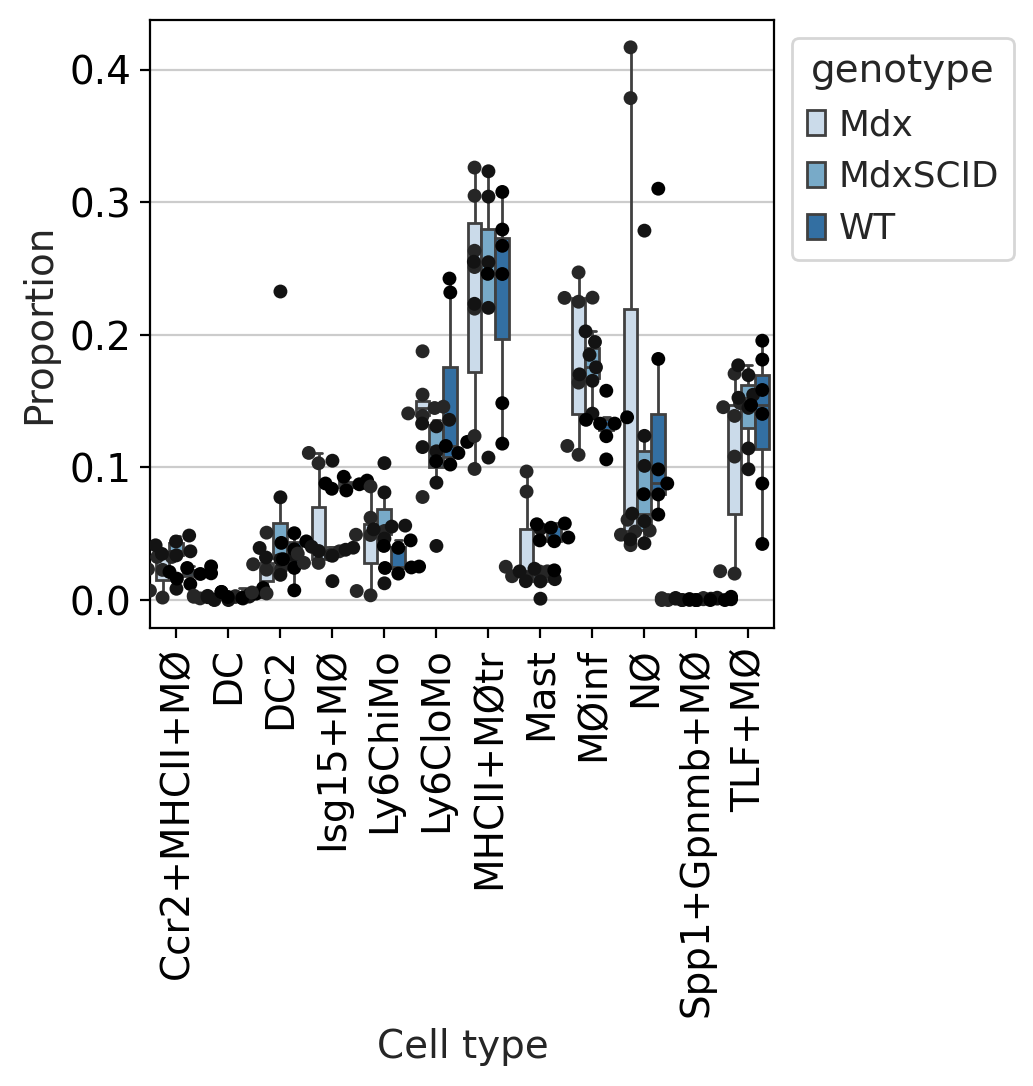

In [42]:
pt.pl.coda.boxplots(sccoda_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

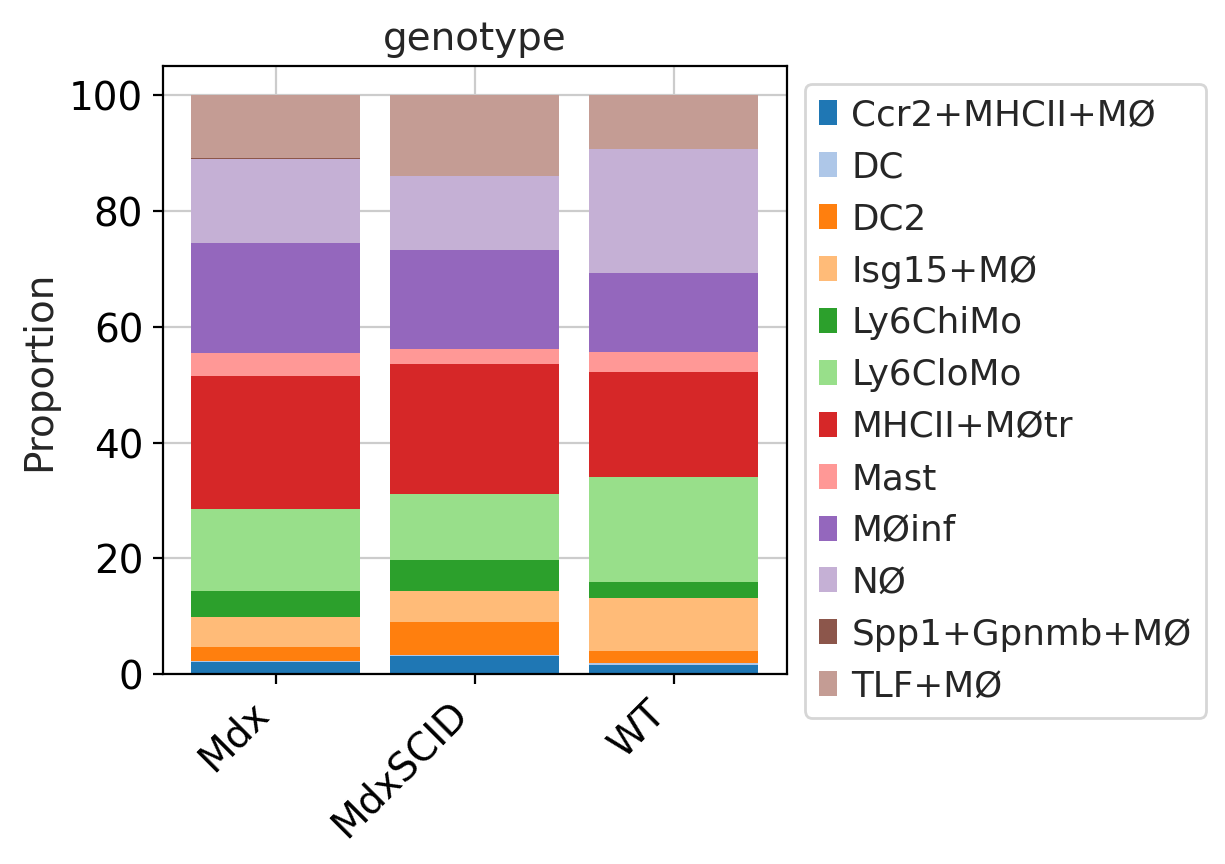

In [43]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

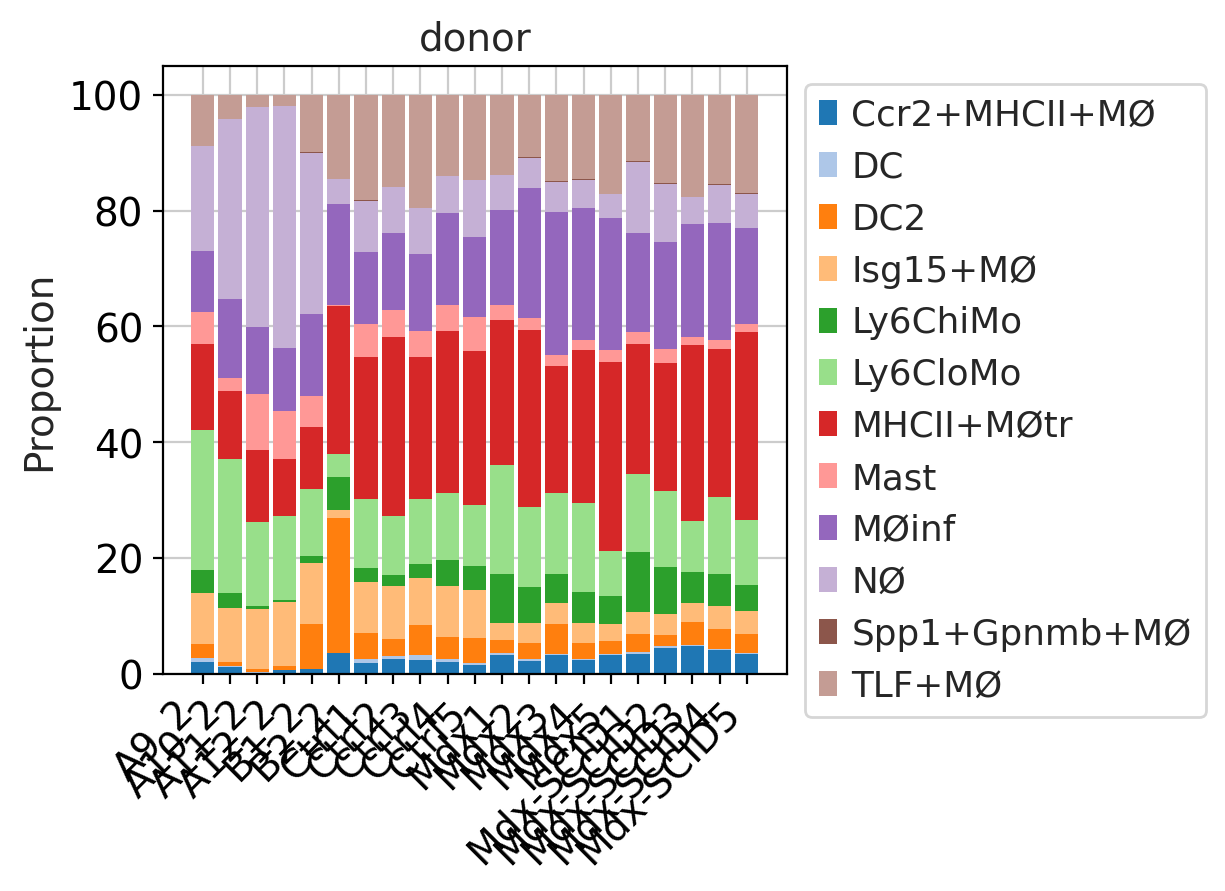

In [44]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='donor')

In [45]:
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key= 'coda', formula= 'genotype')
sccoda_model.run_nuts(sccoda_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to Ccr2+MHCII+MØ

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [00:51<00:00, 213.51it/s, 127 steps of size 2.38e-02. acc. prob=0.87]


In [46]:
sccoda_model.set_fdr(sccoda_data, 0.05)

In [47]:
sccoda_data

MuData object with n_obs × n_vars = 41737 × 16072
  2 modalities
    rna:	41716 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	21 x 12
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.MdxSCID]', 'effect_df_genotype[T.WT]'

In [48]:
sccoda_data['coda'].varm['effect_df_genotype[T.MdxSCID]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
Ccr2+MHCII+MØ,0.0,0.000,0.000,0.000,0.0000,63.716688,0.0
DC,0.0,-0.603,0.350,0.177,0.4916,19.539665,0.0
DC2,0.0,-0.175,0.745,0.231,0.5910,75.826399,0.0
Isg15+MØ,0.0,-0.611,0.209,0.179,0.5144,121.443180,0.0
Ly6ChiMo,0.0,-0.170,0.650,0.189,0.5418,90.057333,0.0
Ly6CloMo,0.0,-0.550,0.122,0.160,0.5393,275.185798,0.0
MHCII+MØtr,0.0,-0.212,0.328,0.093,0.4111,456.891753,0.0
Mast,0.0,-0.836,0.154,0.267,0.6372,78.370415,0.0
MØinf,0.0,-0.243,0.331,0.098,0.4093,351.583241,0.0


In [49]:
sccoda_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
Ccr2+MHCII+MØ,0.0,0.000,0.000,0.000,0.0000,63.716688,0.0
DC,0.0,-0.326,0.633,0.187,0.4991,19.539665,0.0
DC2,0.0,-0.384,0.422,0.139,0.4593,75.826399,0.0
Isg15+MØ,0.0,-0.067,0.868,0.283,0.7497,121.443180,0.0
Ly6ChiMo,0.0,-0.450,0.329,0.137,0.4706,90.057333,0.0
Ly6CloMo,0.0,-0.193,0.439,0.118,0.4610,275.185798,0.0
MHCII+MØtr,0.0,-0.232,0.297,0.091,0.4195,456.891753,0.0
Mast,0.0,-0.235,0.730,0.230,0.5701,78.370415,0.0
MØinf,0.0,-0.469,0.115,0.143,0.5366,351.583241,0.0


In [50]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate            Cell Type    
genotype[T.MdxSCID]  Ccr2+MHCII+MØ    False
                     DC               False
                     DC2              False
                     Isg15+MØ         False
                     Ly6ChiMo         False
                     Ly6CloMo         False
                     MHCII+MØtr       False
                     Mast             False
                     MØinf            False
                     NØ               False
                     Spp1+Gpnmb+MØ    False
                     TLF+MØ           False
genotype[T.WT]       Ccr2+MHCII+MØ    False
                     DC               False
                     DC2              False
                     Isg15+MØ         False
                     Ly6ChiMo         False
                     Ly6CloMo         False
                     MHCII+MØtr       False
                     Mast             False
                     MØinf            False
                     NØ               Fal

In [51]:
mdx_data = adata[adata.obs['genotype'].isin(['WT', 'Mdx'])].copy()
mdxscid_data = adata[adata.obs['genotype'].isin(['WT', 'MdxSCID'])].copy()

# ScCODA - Mdx

In [52]:
mdx_model = pt.tl.Sccoda()
sccoda_mdx_data = mdx_model.load(mdx_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdx_data

MuData object with n_obs × n_vars = 28052 × 16072
  2 modalities
    rna:	28038 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	14 x 12
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

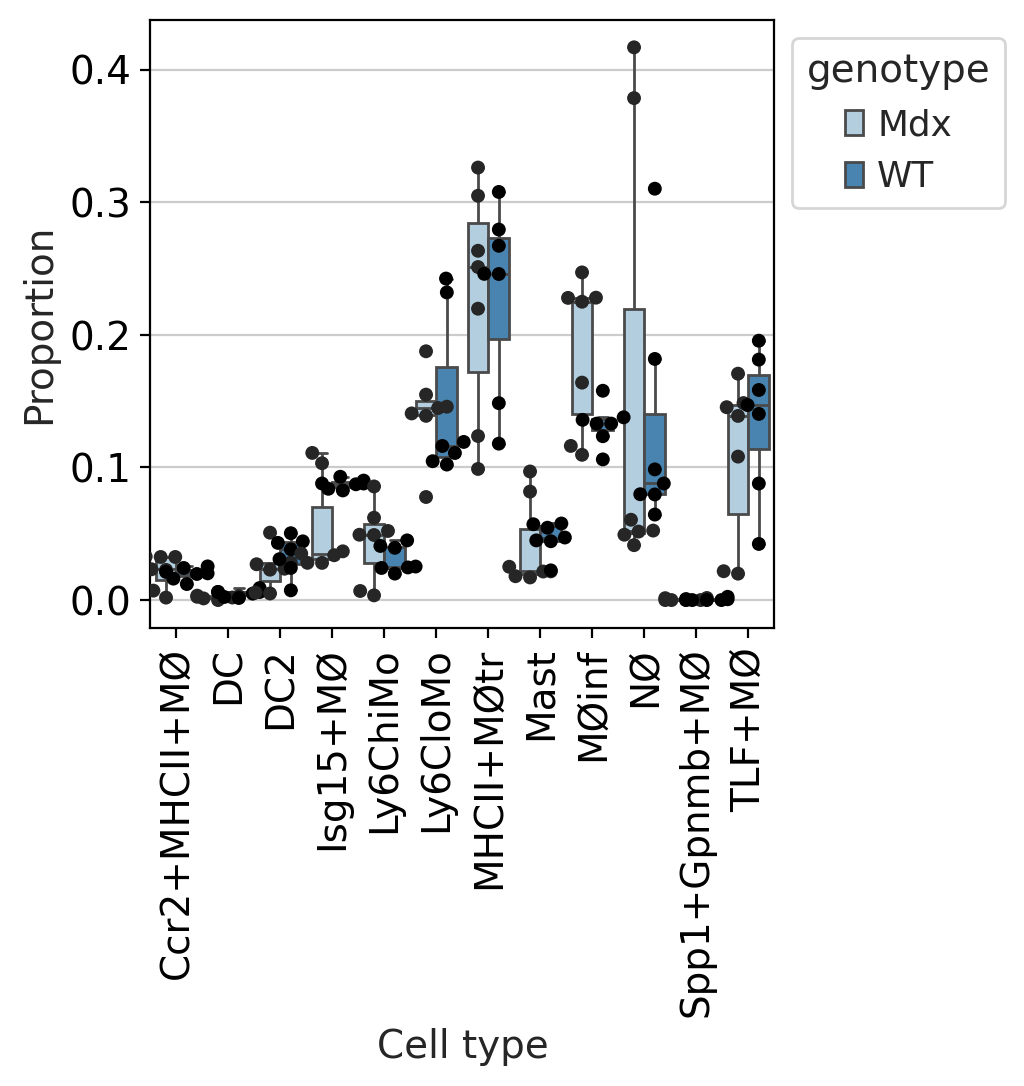

In [53]:
pt.pl.coda.boxplots(sccoda_mdx_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

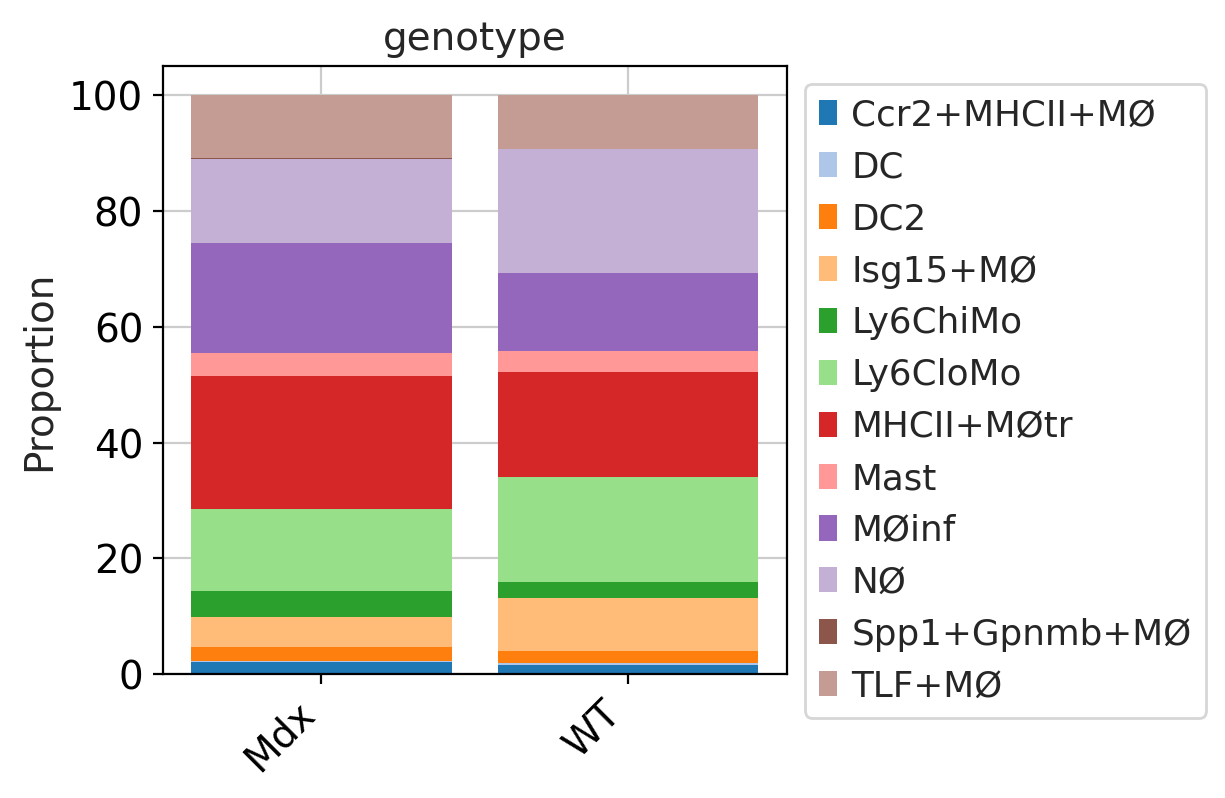

In [54]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

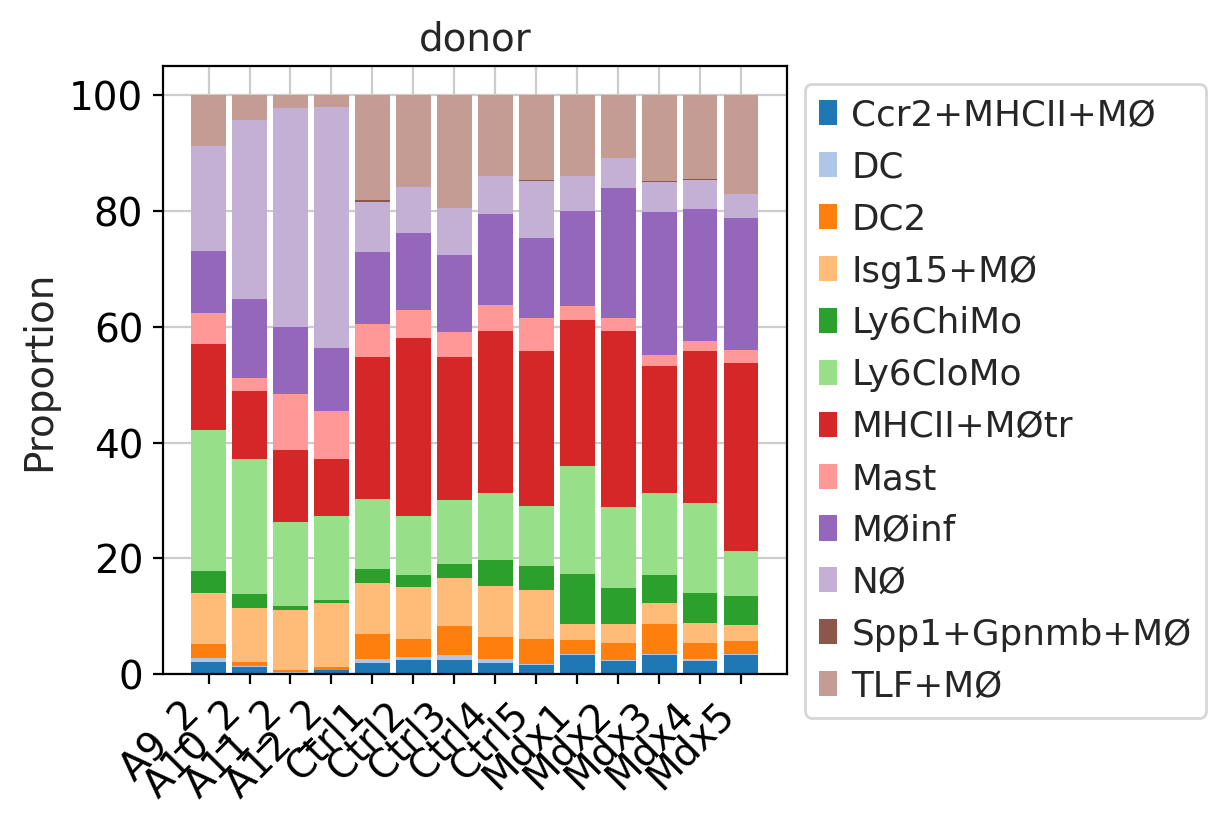

In [55]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='donor')

In [56]:
sccoda_mdx_data = mdx_model.prepare(sccoda_mdx_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdx_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to Ccr2+MHCII+MØ

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [00:18<00:00, 579.96it/s, 63 steps of size 4.71e-02. acc. prob=0.79] 


In [57]:
mdx_model.set_fdr(sccoda_mdx_data, 0.05)

In [58]:
sccoda_mdx_data

MuData object with n_obs × n_vars = 28052 × 16072
  2 modalities
    rna:	28038 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	14 x 12
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [59]:
sccoda_mdx_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
Ccr2+MHCII+MØ,0.0,0.000,0.000,0.000,0.0000,56.588614,0.0
DC,0.0,-0.379,0.551,0.174,0.4947,21.516236,0.0
DC2,0.0,-0.254,0.591,0.169,0.5020,66.540301,0.0
Isg15+MØ,0.0,-0.148,0.801,0.259,0.6483,137.525286,0.0
Ly6ChiMo,0.0,-0.357,0.426,0.136,0.4757,81.272508,0.0
Ly6CloMo,0.0,-0.288,0.321,0.103,0.4443,298.809964,0.0
MHCII+MØtr,0.0,-0.207,0.360,0.100,0.4403,452.509066,0.0
Mast,0.0,-0.243,0.593,0.169,0.5106,94.708883,0.0
MØinf,0.0,-0.498,0.130,0.141,0.5179,345.436142,0.0


In [60]:
mdx_model.credible_effects(sccoda_mdx_data, modality_key="coda")

Covariate       Cell Type    
genotype[T.WT]  Ccr2+MHCII+MØ    False
                DC               False
                DC2              False
                Isg15+MØ         False
                Ly6ChiMo         False
                Ly6CloMo         False
                MHCII+MØtr       False
                Mast             False
                MØinf            False
                NØ               False
                Spp1+Gpnmb+MØ    False
                TLF+MØ           False
Name: Final Parameter, dtype: bool

# ScCODA - MdxSCID

In [61]:
mdxscid_model = pt.tl.Sccoda()
sccoda_mdxscid_data = mdxscid_model.load(mdxscid_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 30774 × 16072
  2 modalities
    rna:	30760 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	14 x 12
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

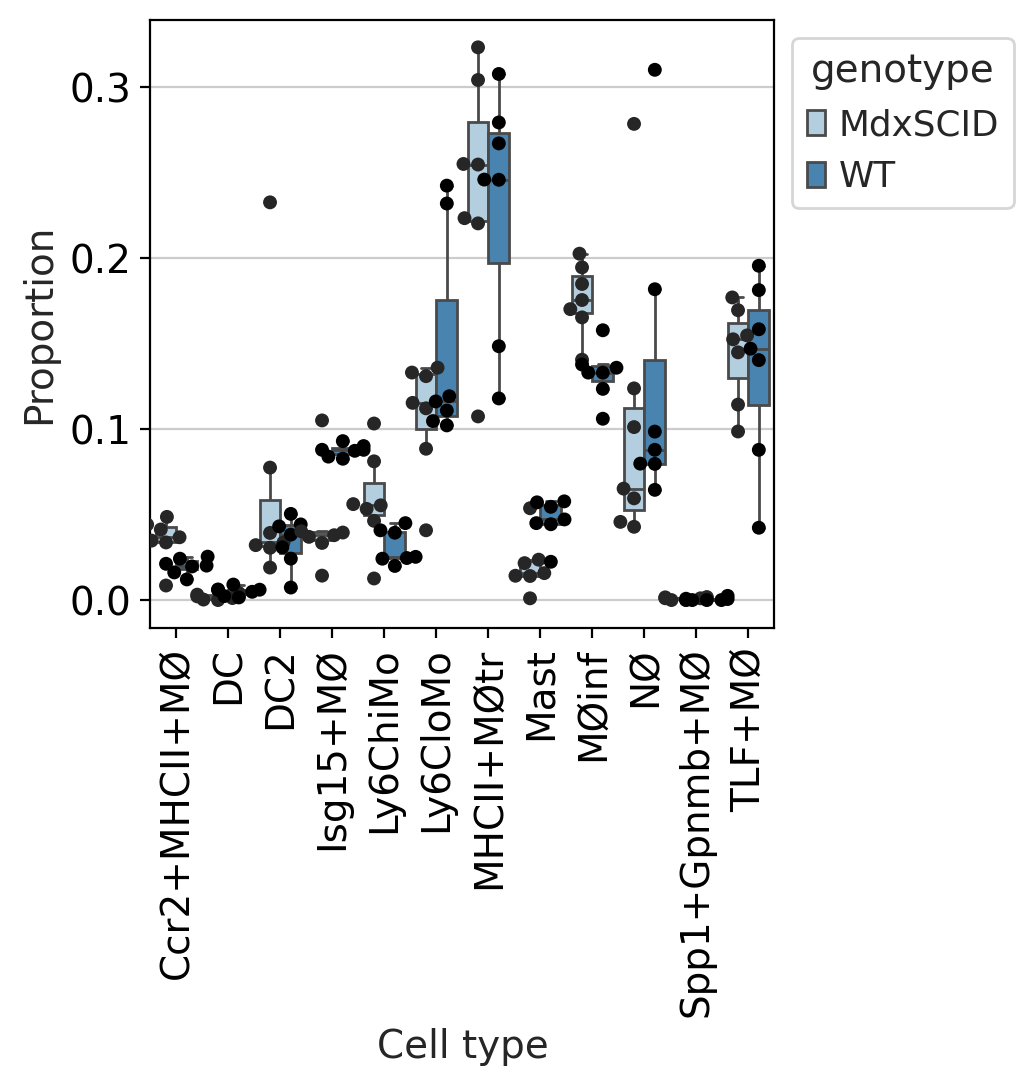

In [62]:
pt.pl.coda.boxplots(sccoda_mdxscid_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

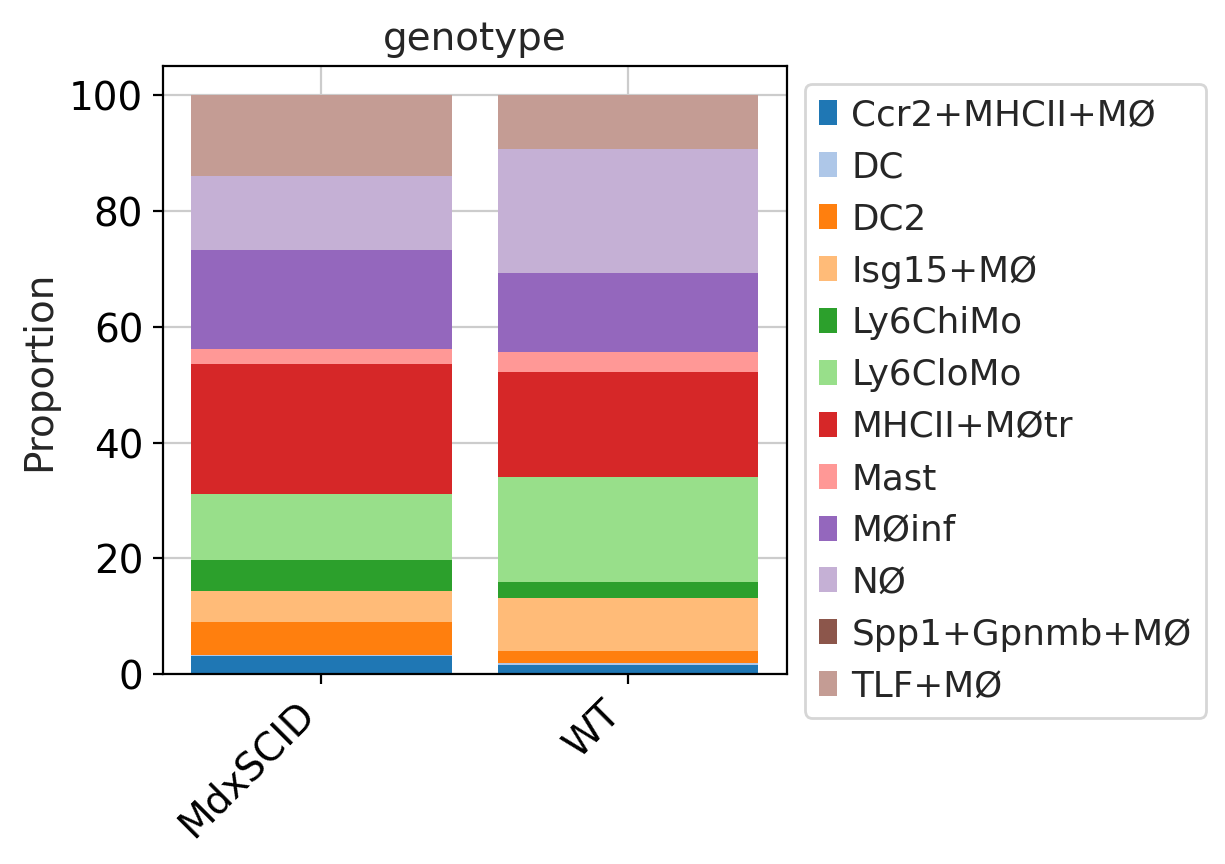

In [63]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

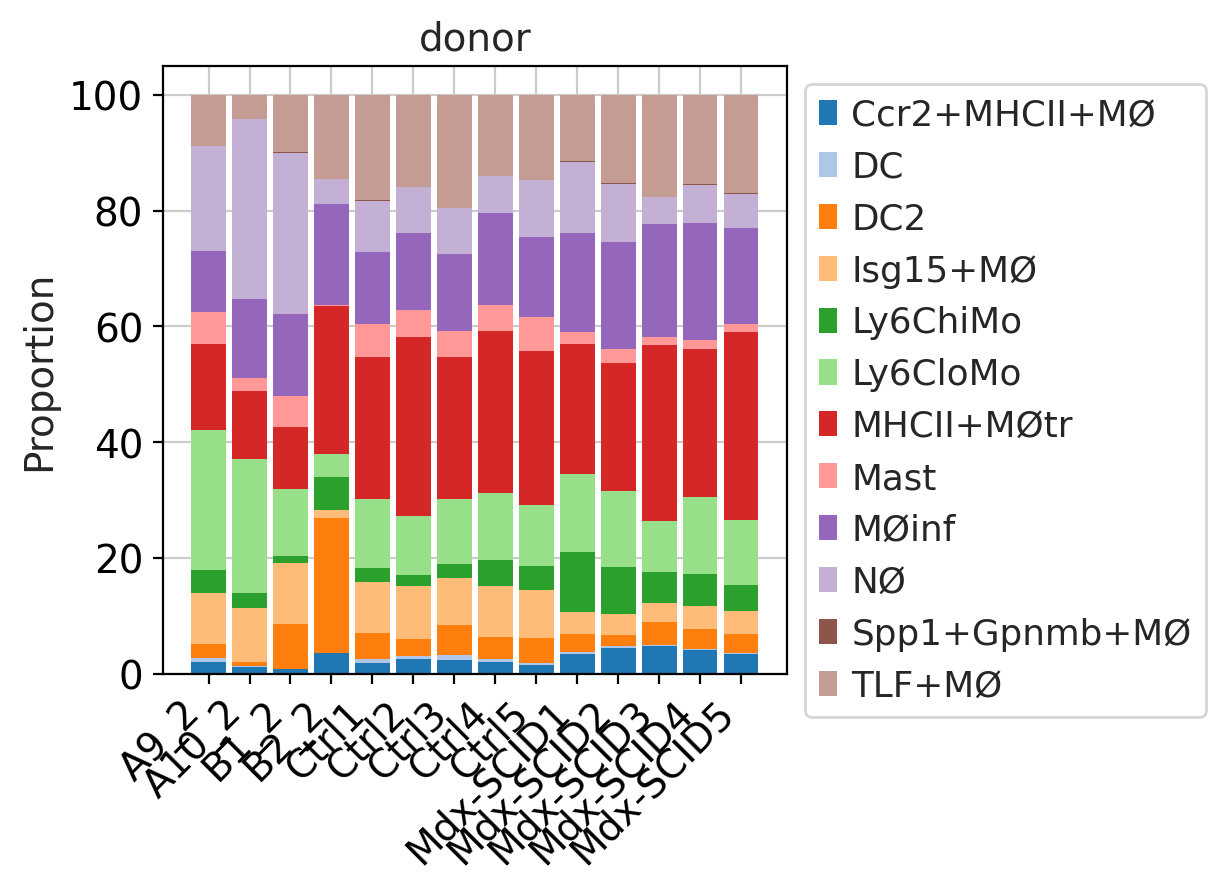

In [64]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='donor')

In [65]:
sccoda_mdxscid_data = mdx_model.prepare(sccoda_mdxscid_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdxscid_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to MØinf

Zero counts encountered in data! Added a pseudocount of 0.5.

sample: 100%|██████████| 11000/11000 [00:29<00:00, 375.24it/s, 127 steps of size 3.07e-02. acc. prob=0.72]


In [66]:
mdx_model.set_fdr(sccoda_mdxscid_data, 0.05)

In [67]:
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 30774 × 16072
  2 modalities
    rna:	30760 x 16060
      obs:	'orig.ident', 'Age_group', 'BMI', 'COVID_severity', 'COVID_status', 'Ethnicity', 'Group', 'Sex', 'annotation_broad', 'annotation_detailed', 'sample_id', 'seed_labels', 'donor', 'cell_states', 'sample', 'cell_source', 'genotype', 'nCount_HTO', 'nFeature_HTO', 'HTO_classification', 'Library', 'CD45_Annotation', 'cell_types', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'scrublet_score', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'MPC_Annotation', 'compartment'
      var:	'gene_ids-DMD_immune-DMD', 'feature_types-DMD_immune-DMD', 'genome-DMD_immune-DMD', 'mt-DMD_immune-DMD', 'ribo-DMD_immune-DMD', 'n_cells_by_counts-DMD_immune-DMD', 'mean_counts-DMD_immune-DMD', 'pct_dropout_by_counts-DMD_immune-DMD', 'total_counts-DMD_immune-DMD', 'vst.mean-MDX_MPC-DMD', 'vst.variance-MDX_MPC-DMD', 'vst.variance.expected-MDX_MPC-DMD', 'vst.variance.standardized-MDX_MPC-DMD', 'vst.variable-MDX_MPC-DMD', 'vst.mean-MDX_POOL_NEW-DMD', 'vst.variance-MDX_POOL_NEW-DMD', 'vst.variance.expected-MDX_POOL_NEW-DMD', 'vst.variance.standardized-MDX_POOL_NEW-DMD', 'vst.variable-MDX_POOL_NEW-DMD', 'vst.mean-MDX_MPC', 'vst.variance-MDX_MPC', 'vst.variance.expected-MDX_MPC', 'vst.variance.standardized-MDX_MPC', 'vst.variable-MDX_MPC', 'vst.mean-MDX_POOL_NEW', 'vst.variance-MDX_POOL_NEW', 'vst.variance.expected-MDX_POOL_NEW', 'vst.variance.standardized-MDX_POOL_NEW', 'vst.variable-MDX_POOL_NEW', 'name-pbmc_meyer'
      uns:	'C_scANVI_S1_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_source_colors', 'genotype_colors', 'hvg', 'neighbors', 'sample_colors', 'seed_labels_colors', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    coda:	14 x 12
      obs:	'donor', 'cell_source', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [68]:
sccoda_mdxscid_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
Ccr2+MHCII+MØ,0.0,-0.720,0.329,0.207,0.4568,76.123926,0.0
DC,0.0,-0.347,0.941,0.274,0.5058,18.126276,0.0
DC2,0.0,-0.679,0.271,0.197,0.4626,106.310348,0.0
Isg15+MØ,0.0,-0.002,1.108,0.332,0.9181,115.164625,0.0
Ly6ChiMo,0.0,-0.739,0.229,0.223,0.5035,111.984741,0.0
Ly6CloMo,0.0,-0.048,0.721,0.231,0.6414,260.958822,0.0
MHCII+MØtr,0.0,-0.242,0.359,0.098,0.3473,528.669051,0.0
Mast,0.0,-0.035,1.286,0.406,0.8567,59.881201,0.0
MØinf,0.0,0.000,0.000,0.000,0.0000,367.367468,0.0


In [69]:
mdx_model.credible_effects(sccoda_mdxscid_data, modality_key="coda")

Covariate       Cell Type    
genotype[T.WT]  Ccr2+MHCII+MØ    False
                DC               False
                DC2              False
                Isg15+MØ         False
                Ly6ChiMo         False
                Ly6CloMo         False
                MHCII+MØtr       False
                Mast             False
                MØinf            False
                NØ               False
                Spp1+Gpnmb+MØ    False
                TLF+MØ           False
Name: Final Parameter, dtype: bool